# Figure for probeinterface paper

Here a notebook to reproduce figures for paper

**ProbeInterface: a unified framework for probe handling in extracellular electrophysiology**


In [2]:
from probeinterface import plotting, io, Probe, ProbeGroup, get_probe
from probeinterface.plotting import plot_probe_group

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# create contact positions
positions = np.zeros((32, 2))
positions[:, 0] = [0] * 8 + [50] * 8 + [200] * 8 + [250] * 8
positions[:, 1] = list(range(0, 400, 50)) * 4
# create an empty probe object with coordinates in um
probe0 = Probe(ndim=2, si_units='um')
# set contacts
probe0.set_contacts(positions=positions, shapes='circle',shape_params={'radius': 10})
# create probe shape (optional)
polygon = [(-20, 480), (-20, -30), (20, -110), (70, -30), (70, 450),
           (180, 450), (180, -30), (220, -110), (270, -30), (270, 480)]
probe0.set_planar_contour(polygon)

In [4]:
# duplicate the probe and move it horizontally
probe1 = probe0.copy()
# move probe by 600 um in x direction
probe1.move([600, 0])

# Create a probegroup
probegroup = ProbeGroup()
probegroup.add_probe(probe0)
probegroup.add_probe(probe1)

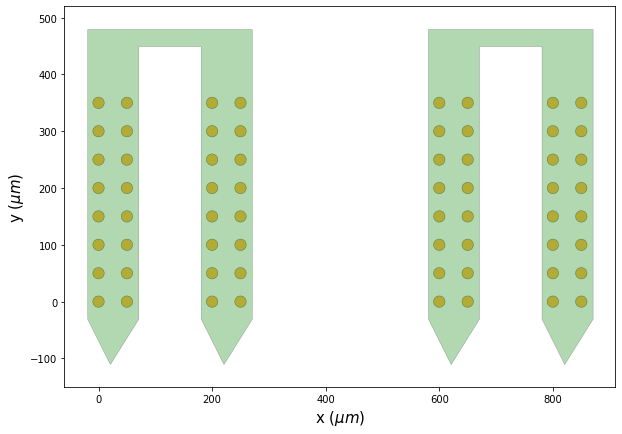

In [5]:
fig2, ax2 = plt.subplots(figsize=(10,7))
plot_probe_group(probegroup, ax=ax2)

In [6]:
fig2.savefig("fig2.pdf")

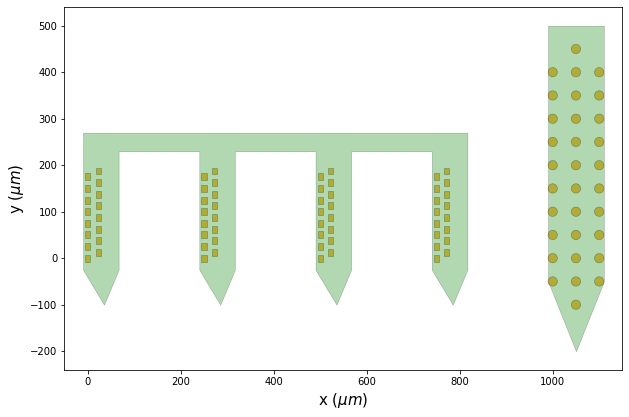

In [7]:
probe0 = get_probe('cambridgeneurotech', 'ASSY-156-P-1')
probe1 = get_probe('neuronexus', 'A1x32-Poly3-10mm-50-177')
probe1.move([1000, -100])

probegroup = ProbeGroup()
probegroup.add_probe(probe0)
probegroup.add_probe(probe1)

fig3, ax3 = plt.subplots(figsize=(10,7))
plot_probe_group(probegroup, ax=ax3)

In [8]:
fig3.savefig("fig3.pdf")

In [9]:
manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-156-P-1'

probe = get_probe(manufacturer, probe_name)
print(probe)

cambridgeneurotech - ASSY-156-P-1 - 64ch - 4shanks


(-150.0, 100.0)

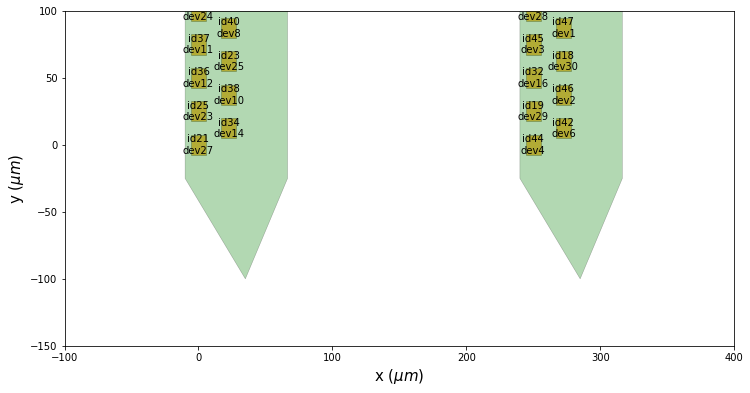

In [10]:
probe.wiring_to_device('ASSY-156>RHD2164')

fig4, ax4 = plt.subplots(figsize=(12,7))
plotting.plot_probe(probe, with_device_index=True, with_contact_id=True, title=False, ax=ax4)
ax4.set_xlim(-100, 400)
ax4.set_ylim(-150, 100)

In [11]:
fig4.savefig("fig4.pdf")

In [12]:
probe.device_channel_indices

array([47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31,
       30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14,
       13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0, 63, 62, 61,
       60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48])

In [13]:
probe.to_dataframe(complete=True)

,x,y,contact_shapes,width,height,shank_ids,contact_ids,device_channel_indices,si_units,plane_axis_x_0,plane_axis_x_1,plane_axis_y_0,plane_axis_y_1
0,522.5,137.5,rect,11.0,15.0,2,1,47,um,1.0,0.0,0.0,1.0
1,500.0,50.0,rect,11.0,15.0,2,2,46,um,1.0,0.0,0.0,1.0
2,522.5,187.5,rect,11.0,15.0,2,3,45,um,1.0,0.0,0.0,1.0
3,500.0,125.0,rect,11.0,15.0,2,4,44,um,1.0,0.0,0.0,1.0
4,772.5,112.5,rect,11.0,15.0,3,5,43,um,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,772.5,37.5,rect,11.0,15.0,3,60,52,um,1.0,0.0,0.0,1.0
60,750.0,150.0,rect,11.0,15.0,3,61,51,um,1.0,0.0,0.0,1.0
61,750.0,50.0,rect,11.0,15.0,3,62,50,um,1.0,0.0,0.0,1.0
62,750.0,125.0,rect,11.0,15.0,3,63,49,um,1.0,0.0,0.0,1.0
